In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

# load dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if isinstance(skill, str) else skill)

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# drop NaN values
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')
df_DA_US['salary_year_avg']

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64

In [3]:
df_DA_US = df_DA_US.explode('job_skills')

In [4]:
df_DA_US_median = df_DA_US.groupby('job_skills').agg(median_salary = ('salary_year_avg', 'median'))
df_DA_US_median = df_DA_US_median.sort_values(by='median_salary', ascending=False)
df_DA_US_median_top_20 = df_DA_US_median.head(10)
df_DA_US_median_top_20

,median_salary
job_skills,
dplyr,196250.0
bitbucket,189000.0
gitlab,186000.0
solidity,179000.0
hugging face,175000.0
couchbase,160515.0
ansible,159640.0
mxnet,149000.0
cassandra,148250.0


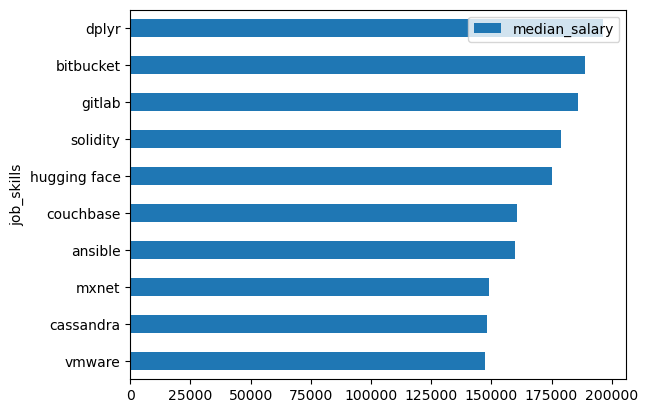

In [5]:
df_DA_US_median_top_20.plot(kind='barh')
plt.gca().invert_yaxis()

In [6]:
df_demand_skills = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]
df_demand_skills = df_demand_skills.dropna(subset='salary_year_avg')
df_demand_skills_explode = df_demand_skills.explode('job_skills')
df_demand_skills_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,sql,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,vba,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,tableau,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,excel,"{'analyst_tools': ['tableau', 'excel', 'altery..."


In [7]:
df_top10_demand_skills = df_demand_skills_explode.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
).sort_values(by='median_salary', ascending=False).head(10)
df_top10_demand_skills

,skill_count,median_salary
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


<Axes: ylabel='job_skills'>

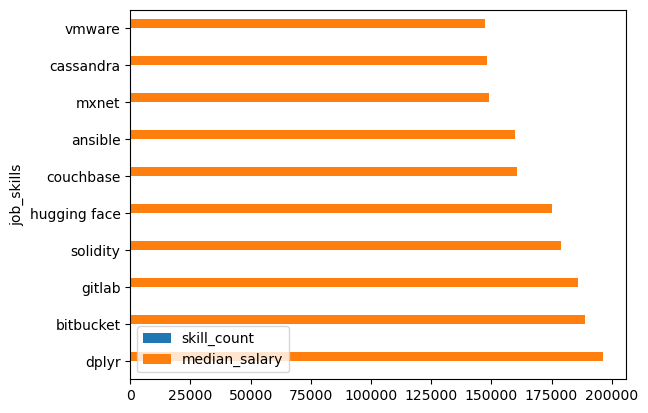

In [8]:
df_top10_demand_skills.plot(kind='barh')


In [12]:
df_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States').copy()]
df_US = df_US.dropna(subset='salary_year_avg')
df_US_ex = df_US.explode('job_skills')
df_US_group = df_US_ex.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
# top paying skills
df_top_paying = df_US_group.sort_values(by='median', ascending=False).head(10)
df_top_paying
# top 10 demand
df_top_demand = df_US_group.sort_values(by='count', ascending=False).head(10)
df_top_demand

,count,median
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


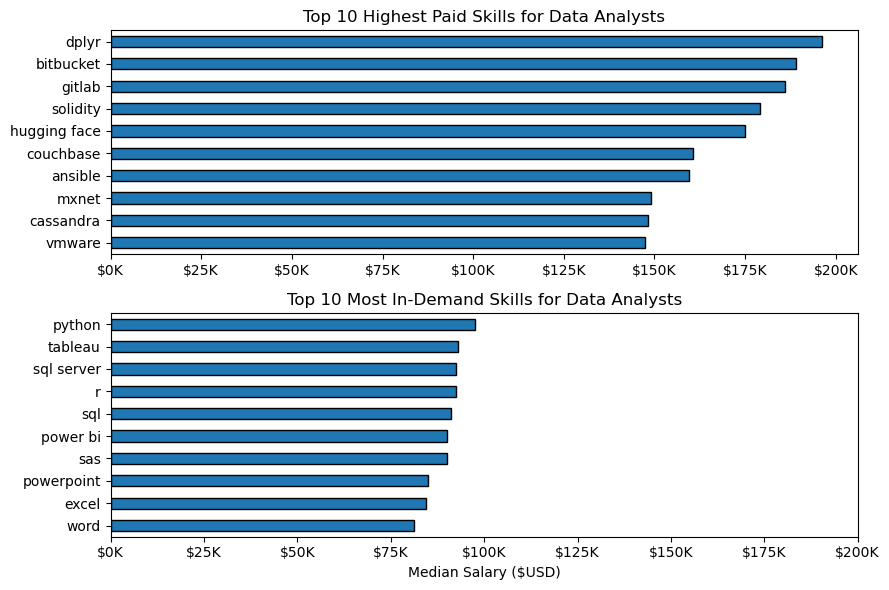

In [13]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(2, 1, figsize=(9, 6))

formatter = ticker.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')

df_top_paying.plot(kind='barh',y='median', ax=ax[0], edgecolor='black')
ax[0].xaxis.set_major_formatter(formatter)
ax[0].invert_yaxis()
ax[0].legend().set_visible(False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')

df_top_demand = df_top_demand.sort_values(by='median', ascending=True)
df_top_demand.plot(kind='barh', y='median', ax=ax[1], edgecolor='black')
ax[1].xaxis.set_major_formatter(formatter)
ax[1].set_xlim(0, 200000)
ax[1].legend().set_visible(False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')

fig.tight_layout()